# Regression Basics
## Lecture notes 1
### Sunil Paul

- The materials in this  notebook is prepared using “Diebold, F.X. (2019), Econometric Data Science: A Predictive Modeling Approach, Department of Economics, University of Pennsylvania, http://www.ssc.upenn.edu/~fdiebold/Textbooks.html.”-


## Introduction
- Does your education has anything to do with your salary?
- How experience increases your salary?
Let us have a look into the data

In [29]:
# Install required packages
library(ggplot2)
library(lmtest)
library(sandwich)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 4.0.3"


In [30]:
#Data
wage95 <- read.csv("DataWages.csv", header=TRUE)
wages <- wage95$WAGE
lnwages <- wage95$LNWAGE
edu <- wage95$EDUC
exper <- wage95$EXPER

In [66]:
h1 <- ggplot()+ geom_histogram(aes(lnwages),binwidth=0.08,color="darkblue", fill="lightblue")+
geom_density(color = "red")+
theme_bw()+xlab("log(Wages)")+ylab("People") 
h2<- ggplot()+ geom_histogram(aes(edu),binwidth=1,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Education")+ylab("People")
h3<- ggplot()+ geom_histogram(aes(exper),binwidth=2,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Experience")+ylab("People")

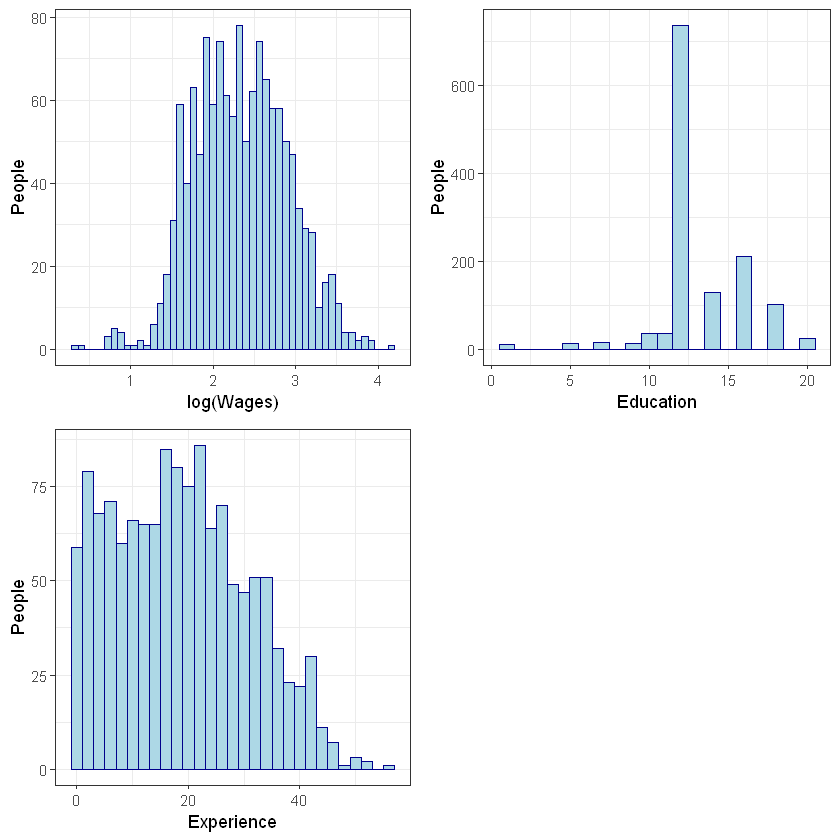

In [67]:
grid.arrange(h1, h2,h3, ncol=2)

# Regression as Curve fitting
Fit a line  like
$$y_i=\beta_1+\beta_2X_i$$

that minimises the devivation from data to the line estimated. 
In general, a 'quantratic loss' fuction9Mean square error) is used to find the "best fit)
$$\min_{\beta_1,\beta_2} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i)^2= Q$$




# Derivation of $\hat{\beta}_1$ and $\hat{\beta}_2$
Differenciate $Q(\beta_1,\beta_2)$ w.r.t $\beta_1$ and $\beta_2$

$$\frac{\partial Q}{\partial{\beta_1}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-1)=0$$
$$\frac{\partial Q}{\partial{\beta_2}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$
solve the above equation for $\beta_1$ and $\beta_2$

Consider the first Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)=0$$

$$\sum_{i=1}^{N}y_i-N{\beta}_1-{\beta}_2\sum_{i=1}^{N} x_i=0$$
Dividing the above equation by N we have 
$$\bar{y}-{\beta}_1-{\beta}_2\bar{x}$$
$$\therefore \hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$$ 

Consider the second Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$

$$\sum_{i=1}^{N}y_ix_i-{\beta}_1\sum_{i=1}^{N}x_i-{\beta}_2\sum_{i=1}^{N} x_i^2=0$$
Dividing the above equation by N we have 
$$\frac{1}{N}\sum_{i=1}^{N}y_ix_i-{\beta}_1\bar{x}-{\beta}_2\frac{1}{N}\sum_{i=1}^{N} x_i^2=0$$
substituting $\hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$ and solving for $\hat{\beta}_2$ we get
$$\hat{\beta}_2=\frac{\frac{1}{N} \sum_{i=1}^{N} y_ix_i-\bar{y}\bar{x}}{\frac{1}{N} \sum_{i=1}^{N}x_i^2-\bar{x}^2}$$


Alternative expressions 

$$\hat{\beta}_2=\frac{\sum (y_i-\bar{y})(x_i-\bar{x})}{\sum (x_i-\bar{x})^2}$$
Alternative expression 
$$\hat{\beta}_2=\frac{Cov(y,x)}{Var(x^2)}$$


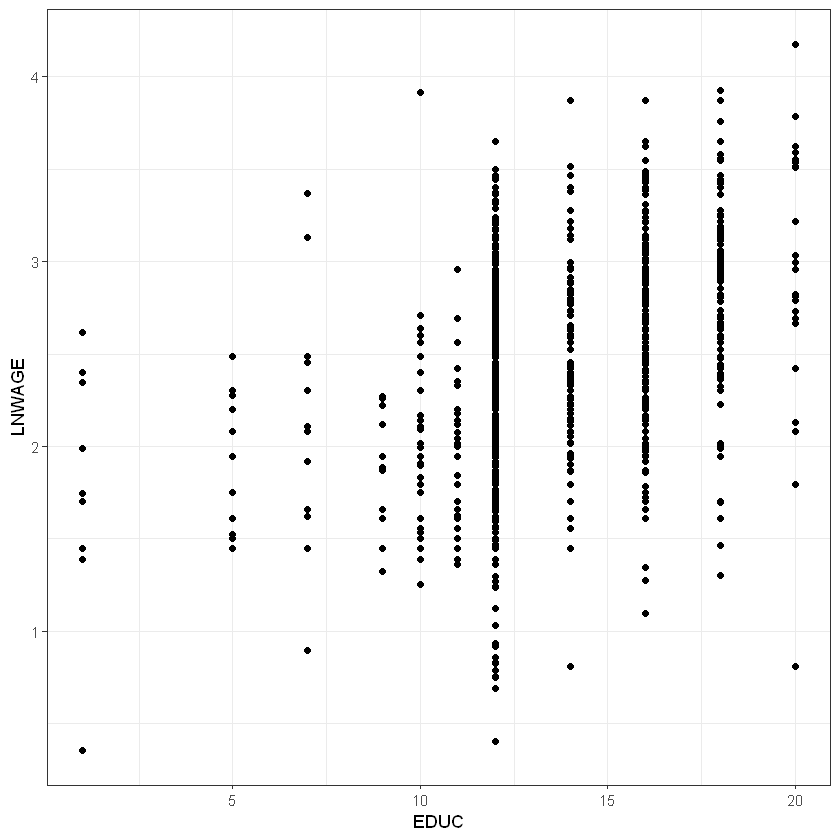

In [96]:
p <- ggplot(data=wage95, aes(y=LNWAGE,x=EDUC))+geom_point()+theme_bw()
p

`geom_smooth()` using formula 'y ~ x'



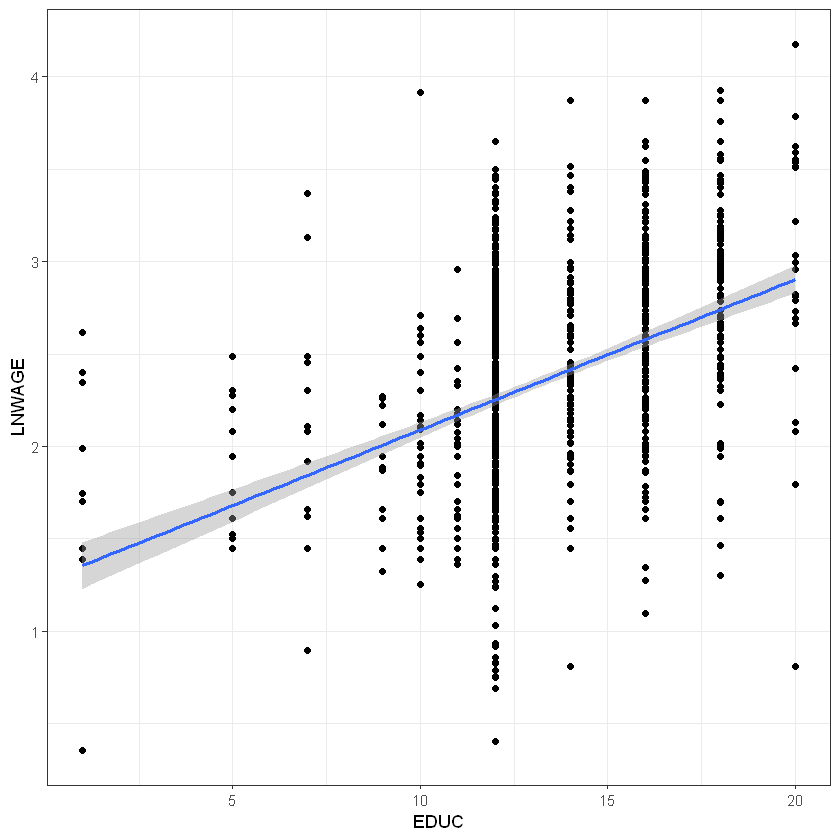

In [98]:
p+geom_smooth(method=lm)


# Actual Values, Fitted Values and Residuals
Actual values: $y_i; i = 1,2,..., N$

Least-squares fitted parameters:$\beta_1$ and $\beta_2$

Fitted values: $\hat{y}_i = \hat{\beta}_1 + \hat{\beta}_2 x_i; i = 1,2,..., N$

Residuals: $e_i = y_i − \hat{y}_i; i = 1,2,..., N$
$$\hat{lwages}=1.273+0.081 EDUC$$

# Multiple Linear Regression (K RHS Variables)
Solve: $$\min_{\beta_1,...,\beta_k} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i-...-\beta_k x_k)^2$$

fitted hyperplane: $$\hat{y}_i = \sum_{k=1}^{K}\hat{\beta}_k x_{ik};$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$



# Multiple regression in Matrix form
 We can represent the multiple regresss more compactly in matrix form as follows
 $$y=X\beta+\varepsilon$$ i.e.
$$ \begin{pmatrix}y_1\\y_2\\\vdots\\y_N\end{pmatrix}=\begin{pmatrix}1&x_{12}&x_{13}&\ldots&x_{1k}\\1&x_{22}&x_{23}&
\ldots&x_{2k}\\ \vdots&&&&\\1&x_{N2}&x_{N3}&\ldots&x_{Nk}\end{pmatrix}\begin{pmatrix}\beta_1\\ \beta_2\\ \vdots\\\beta_k\end{pmatrix}+ \begin{pmatrix}e_1\\ e_2\\ \vdots\\e_N\end{pmatrix}$$
or
 $${y}_i = \sum_{k=1}^{K}{\beta}_k x_{ik}+\varepsilon_i;$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$


# Multiple regression in Matrix form
In matrix notation the curve filleing problem can be represented as
$$\min_{\beta}((y-X\beta)'(y-X\beta))$$ and 

It can be shown that the solution is:
$$\beta_{LS}=(X'X)^{-1}X'y$$



# Regression as a probability Model

## A Population Model and a Sample Estimator
### Ideal conditions (IC)

- The data-generating process (DGP) is:
$$y=X\beta+\varepsilon$$
$$\varepsilon \sim N(O,\sigma^2 I)$$ and the fitted model matches it exactly.
    - The fitted model is correctly specified
    - The disturbances are Gaussian
    - The coefficients$(\beta)$ are fixed
    - The relationship is linear
    - $Var(\varepsilon)=\sigma^2I$; variance of error are constant
    - $E(\varepsilon_i\varepsilon_j)=0;i\ne j$ errors are uncorrelated

## A Population Model and a Sample Estimator
### Ideal conditions (IC)
- $E(\varepsilon X)=0$  errors are  independent of X
    - $E(\varepsilon|X)=0$
    -  $Var(\varepsilon|X)=\sigma^2$

# Large-Sample Distribution of $\beta_{LS}$
## Under the IC
$\beta_{LS}$ is consistent and asymptotically normally distributed with
covariance matrix V,
$$\beta_{LS}\stackrel{a}{\sim} N(\beta,V)$$

we estimate $V$ using $V^= s^2(X'X)^{−1}$, where $s^2=\frac{\sum_{i=1}^{N}e_i^2}{N − K}$

In [13]:
reg1 <- lm(LNWAGE~EDUC + EXPER,data=wage95)
summary(reg1)


Call:
lm(formula = LNWAGE ~ EDUC + EXPER, data = wage95)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96035 -0.32125  0.00331  0.33805  1.64061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.867382   0.075331   11.51   <2e-16 ***
EDUC        0.093229   0.005045   18.48   <2e-16 ***
EXPER       0.013104   0.001164   11.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4923 on 1320 degrees of freedom
Multiple R-squared:  0.2322,	Adjusted R-squared:  0.2311 
F-statistic: 199.6 on 2 and 1320 DF,  p-value: < 2.2e-16
